## Logistic Regression: Breast Cancer Wisconsin

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
# from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### 1. Data Import and Cleansing

In [102]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [103]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [104]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

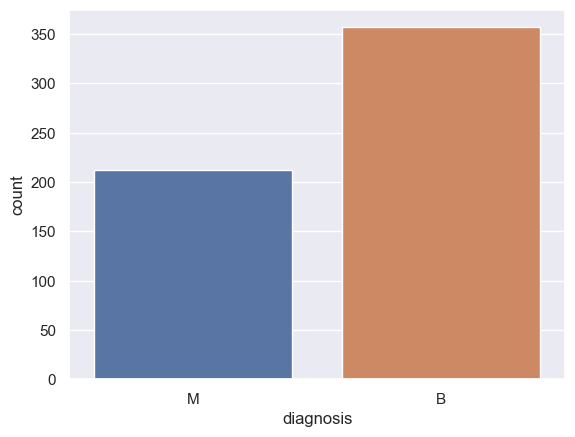

In [105]:
sns.set()
sns.countplot(data=df, x=df.diagnosis)
plt.show()

In [106]:
df.diagnosis.replace(to_replace=['M', 'B'], value=[1, 0], inplace=True)

In [107]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [108]:
df_data_processing = df.copy()

In [109]:
df_data_processing.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [110]:
df_data_processing.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Correlation Analysis

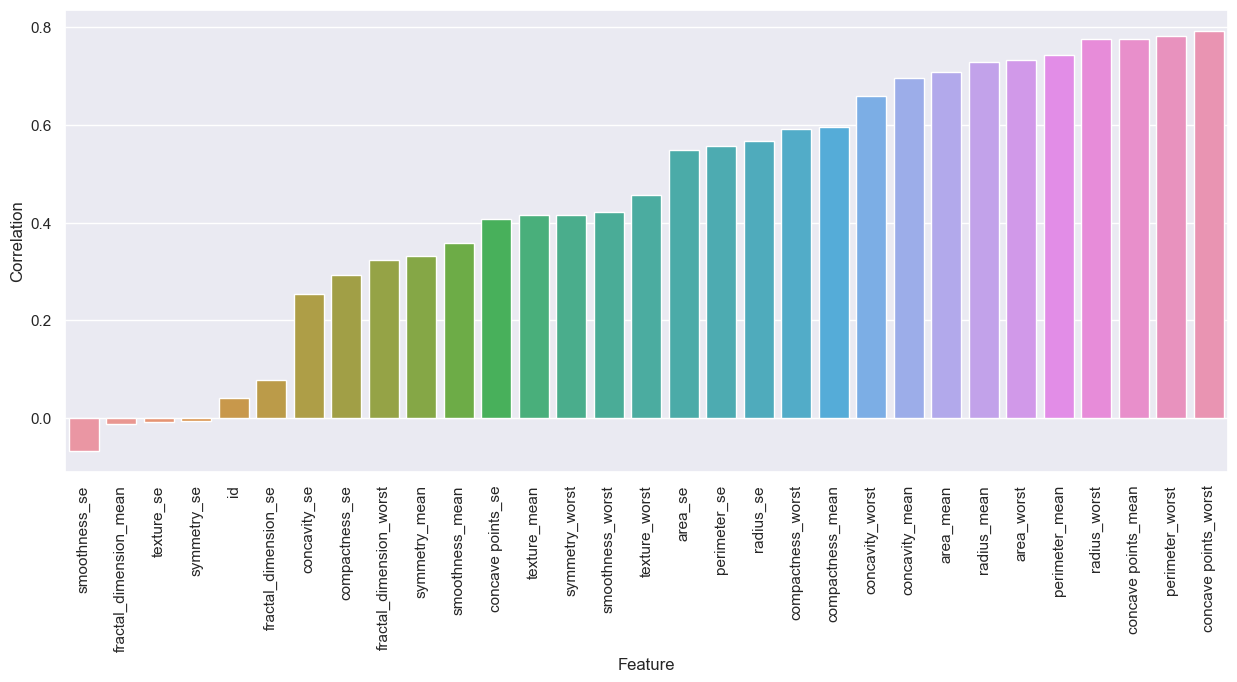

In [112]:
data_corr = df_data_processing.corr()['diagnosis'].sort_values(ascending=True)[:-1].reset_index()

fig = plt.figure(figsize=(15,6))
sns.barplot(data=data_corr, x='index', y='diagnosis')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [113]:
df_data_processing['diagnosis'].count()

569

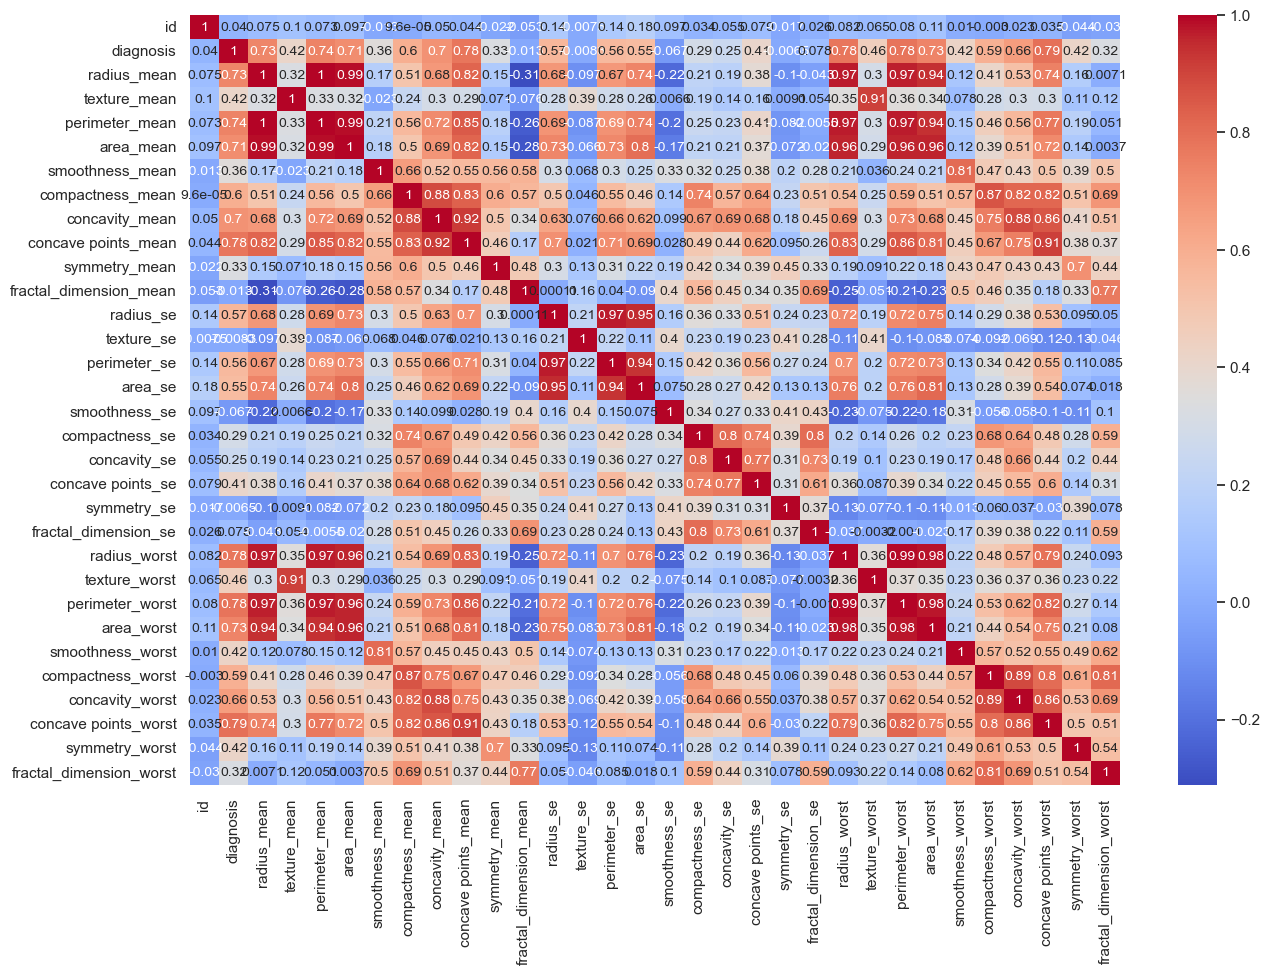

In [114]:
fig = plt.figure(figsize=(15,10))

sns.heatmap(data=df_data_processing.corr(), annot=True, annot_kws={'fontsize': 10}, cmap='coolwarm')
plt.show()

### 3. Evaluate and Handle Multicolinearity

#### Check Multicolinearity with the Variance Inflation Factor

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [288]:
st_x = StandardScaler()
X = df_data_processing.drop(['diagnosis'], axis=1)
y = df_data_processing['diagnosis']

df_scaled = st_x.fit_transform(X)
cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [290]:
X_data = pd.DataFrame()
X_data['Feature'] = X.columns

X_data['VIF'] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(X.columns))]

print(X_data)

                    Feature          VIF
0               radius_mean  3806.115296
1              texture_mean    11.884048
2            perimeter_mean  3786.400419
3                 area_mean   347.878657
4           smoothness_mean     8.194282
5          compactness_mean    50.505168
6            concavity_mean    70.767720
7       concave points_mean    60.041733
8             symmetry_mean     4.220656
9    fractal_dimension_mean    15.756977
10                radius_se    75.462027
11               texture_se     4.205423
12             perimeter_se    70.359695
13                  area_se    41.163091
14            smoothness_se     4.027923
15           compactness_se    15.366324
16             concavity_se    15.694833
17        concave points_se    11.520796
18              symmetry_se     5.175426
19     fractal_dimension_se     9.717987
20             radius_worst   799.105946
21            texture_worst    18.569966
22          perimeter_worst   405.023336
23              

In [293]:
X_vif = df_scaled.drop([x for x in X_data[X_data['VIF'] > 12]['Feature'].values], axis=1)
X_vif.head()

,texture_mean,smoothness_mean,symmetry_mean,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst
0,-2.073335,1.568466,2.217515,-0.565265,-0.214002,0.660820,1.148757,0.907083,1.307686,2.750622
1,-0.353632,-0.826962,0.001392,-0.876244,-0.605351,0.260162,-0.805450,-0.099444,-0.375612,-0.243890
2,0.456187,0.942210,0.939685,-0.780083,-0.297005,1.424827,0.237036,0.293559,0.527407,1.152255
3,0.253732,3.283553,2.867383,-0.110409,0.689702,1.115007,4.732680,2.047511,3.394275,6.046041
4,-1.151816,0.280372,-0.009560,-0.790244,1.483067,1.144205,-0.361092,0.499328,0.220556,-0.868353


In [302]:
# Check VIF again
X_data = pd.DataFrame()
X_data['Feature'] = X_vif.columns

X_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(X_data)

                Feature       VIF
0          texture_mean  1.456939
1       smoothness_mean  5.081094
2         symmetry_mean  3.325319
3            texture_se  1.956308
4         smoothness_se  2.893056
5     concave points_se  1.897215
6           symmetry_se  3.448551
7  fractal_dimension_se  1.821351
8      smoothness_worst  7.209637
9        symmetry_worst  5.734737


In [282]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_vif,y, test_size=0.33, random_state=42)

# Parameter grid
parameters = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'multi_class': ['ovr', 'multinomial']
}

log_reg = LogisticRegression()

clf = GridSearchCV(log_reg,                # model
                   param_grid=parameters,  # hyperparameters
                   scoring='accuracy',     # metric for scoring
                   cv=10)    

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']},
             scoring='accuracy')

In [297]:
print('Best Hyperparameters: ', clf.best_params_)
print('Best Estimator: ', clf.best_estimator_)
print('Best Accuracy: ', clf.best_score_)

Best Hyperparameters:  {'multi_class': 'ovr', 'solver': 'newton-cg'}
Best Estimator:  LogisticRegression(multi_class='ovr', solver='newton-cg')
Best Accuracy:  0.8817139001349528


In [303]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[110  11]
 [ 11  56]]
0.8829787234042553


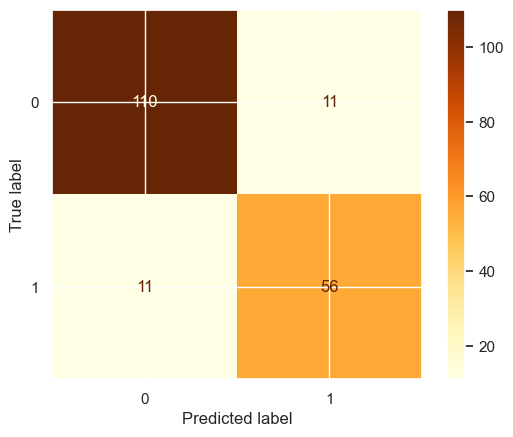

In [315]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlOrBr')
plt.show()

### 4. Logistic  Regression with all Features

#### Split and Scale Data

In [304]:
df_data_processing.drop(['perimeter_mean'], axis=1, inplace=True)
df_data_processing.drop(['perimeter_worst'], axis=1, inplace=True)

In [305]:
scaler = StandardScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [306]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = df_data_processing.columns
df_data_processing_scaled.head()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [307]:
X = df_data_processing.drop('diagnosis', axis=1)
y = df_data_processing['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [308]:
print(X_train.shape)
print(X_test.shape)

(398, 28)
(171, 28)


In [309]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [310]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.9707602339181286
